<a href="https://colab.research.google.com/github/demolakstate/AdeNet-Deep-Learning-Architecture/blob/main/Visualizing_Activation_Heatmaps_v3_insulators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pwd

'/content'

In [ ]:
#mv sample_data/data.zip .

In [ ]:
ls

Chinook-On-White-03.jpg  data.zip      sample_data/
data/                    elephant.jpg  Thinking-of-getting-a-cat.png


In [ ]:
#!unzip data.zip

In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow # cv2.imshow does not work on Google Colab notebooks, which is why we are using cv2_imshow instead

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
model = InceptionV3(weights='imagenet')

model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_470 (Conv2D)             (None, 149, 149, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_470 (BatchN (None, 149, 149, 32) 96          conv2d_470[0][0]                 
__________________________________________________________________________________________________
activation_990 (Activation)     (None, 149, 149, 32) 0           batch_normalization_470[0][0]    
_______________________________________________________________________________________

In [ ]:
#!wget https://indiasendangered.com/wp-content/uploads/2011/09/elephant.jpg
#!wget https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12234558/Chinook-On-White-03.jpg
#!wget https://icatcare.org/app/uploads/2018/07/Thinking-of-getting-a-cat.png

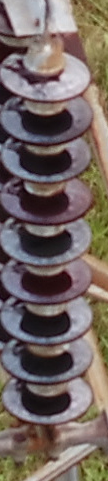

In [ ]:
ORIGINAL = '/content/data/train/damaged/1017.tiff'

DIM = 299

img = image.load_img(ORIGINAL, target_size=(DIM, DIM))

cv2_imshow(cv2.imread(ORIGINAL)) # Visualize image

#cv2_imshow(cv2.imread(img)) # Visualize image

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print(decode_predictions(preds))

[[('n03459775', 'grille', 0.24604508), ('n04265275', 'space_heater', 0.13511853), ('n04465501', 'tractor', 0.052888785), ('n04040759', 'radiator', 0.032335524), ('n02672831', 'accordion', 0.026043015)]]


In [ ]:
with tf.GradientTape() as tape:
  #last_conv_layer = model.get_layer('conv2d_93')
  last_conv_layer = model.get_layer('conv2d_563')
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

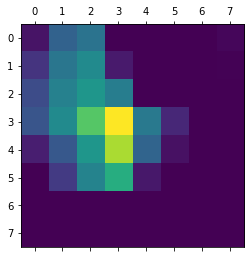

In [ ]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((8, 8))
plt.matshow(heatmap)
plt.show()

In [ ]:

img = cv2.imread(ORIGINAL)

In [ ]:
INTENSITY = 0.5

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

img = heatmap * INTENSITY + img

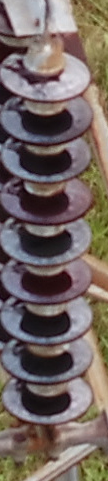

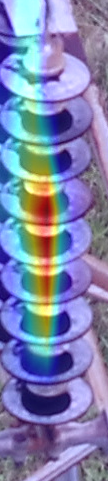

In [ ]:
cv2_imshow(cv2.imread(ORIGINAL))
cv2_imshow(img)

In [ ]:
train_dir = '/content/data/train'
validation_dir = '/content/data/validation'
test_dir = '/content/data/test'

In [ ]:
train_damaged_dir = os.path.join(train_dir, 'damaged')  # directory with our training damaged pictures
train_undamaged_dir = os.path.join(train_dir, 'undamaged')  # directory with our training undamaged pictures
validation_damaged_dir = os.path.join(validation_dir, 'damaged')  # directory with our validation damaged pictures
validation_undamaged_dir = os.path.join(validation_dir, 'undamaged')  # directory with our validation undamaged pictures
test_damaged_dir = os.path.join(test_dir, 'damaged')  # directory with our test damaged pictures
test_undamaged_dir = os.path.join(test_dir, 'undamaged')  # directory with our test undamaged pictures

In [ ]:
num_damaged_tr = len(os.listdir(train_damaged_dir))
num_undamaged_tr = len(os.listdir(train_undamaged_dir))

num_damaged_val = len(os.listdir(validation_damaged_dir))
num_undamaged_val = len(os.listdir(validation_undamaged_dir))

num_damaged_ts = len(os.listdir(test_damaged_dir))
num_undamaged_ts = len(os.listdir(test_undamaged_dir))

total_train = num_damaged_tr + num_undamaged_tr
total_val = num_damaged_val + num_undamaged_val
total_test = num_damaged_ts + num_undamaged_ts

In [ ]:
print('total training damaged images:', num_damaged_tr)
print('total training undamaged images:', num_undamaged_tr)

print('total validation damaged images:', num_damaged_val)
print('total validation undamaged images:', num_undamaged_val)

print('total test damaged images:', num_damaged_ts)
print('total test undamaged images:', num_undamaged_ts)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)
print("Total test images:", total_test)

total training damaged images: 167
total training undamaged images: 167
total validation damaged images: 30
total validation undamaged images: 67
total test damaged images: 48
total test undamaged images: 128
--
Total training images: 334
Total validation images: 97
Total test images: 176


In [ ]:
# set up variables
#batch_size = 128


batch_size = 16
#epochs = 5
#IMG_HEIGHT = 150
#IMG_WIDTH = 150

# VGG19, VGG16, Inception
#IMG_HEIGHT = 224
#IMG_WIDTH = 224

# inceptionV3
#IMG_HEIGHT = 299
#IMG_WIDTH = 299


IMG_HEIGHT = 331
IMG_WIDTH = 331

#IMG_HEIGHT = 471
#IMG_WIDTH = 471

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our test data

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 334 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:179: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:179: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 97 images belonging to 2 classes.


In [ ]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=test_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:179: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 176 images belonging to 2 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen)

In [ ]:
sample_training_images, labels = next(train_data_gen)

In [ ]:
labels

array([1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.],
      dtype=float32)

In [ ]:
from tensorflow.keras.applications.nasnet import NASNetLarge, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.nasnet import preprocess_input

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#callback = EarlyStopping(monitor='val_loss', patience=7)

callback = EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True)

In [ ]:
base_model = NASNetLarge(weights='imagenet', include_top=False)

In [ ]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model_NasNet = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model_NasNet.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_NasNet.summary()

Model: "functional_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 331, 331, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_10[0][0]                   
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 165, 165, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_1344 (Activation)    (None, 165, 165, 96) 0           stem_bn1[0][0]                   
______________________________________________________________________________________

In [ ]:
history_NasNet = model_NasNet.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=50,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size,
    #callbacks=[callback, cp_callback]
    callbacks=[callback]
)

Epoch 1/50
20/20 [==============================] - 37s 2s/step - loss: 1.9005 - accuracy: 0.5881 - val_loss: 0.6757 - val_accuracy: 0.6042
Epoch 2/50
20/20 [==============================] - 31s 2s/step - loss: 0.5337 - accuracy: 0.7201 - val_loss: 0.5510 - val_accuracy: 0.7188
Epoch 3/50
20/20 [==============================] - 31s 2s/step - loss: 0.4990 - accuracy: 0.7610 - val_loss: 0.4993 - val_accuracy: 0.7812
Epoch 4/50
20/20 [==============================] - 30s 2s/step - loss: 0.4158 - accuracy: 0.8365 - val_loss: 0.8128 - val_accuracy: 0.5729
Epoch 5/50
20/20 [==============================] - 30s 2s/step - loss: 0.3637 - accuracy: 0.8333 - val_loss: 0.8843 - val_accuracy: 0.5938
Epoch 6/50
20/20 [==============================] - 30s 2s/step - loss: 0.3022 - accuracy: 0.8742 - val_loss: 0.8391 - val_accuracy: 0.7708
Epoch 7/50
20/20 [==============================] - 30s 2s/step - loss: 0.2475 - accuracy: 0.8994 - val_loss: 0.8335 - val_accuracy: 0.6146
Epoch 8/50
20/20 [==

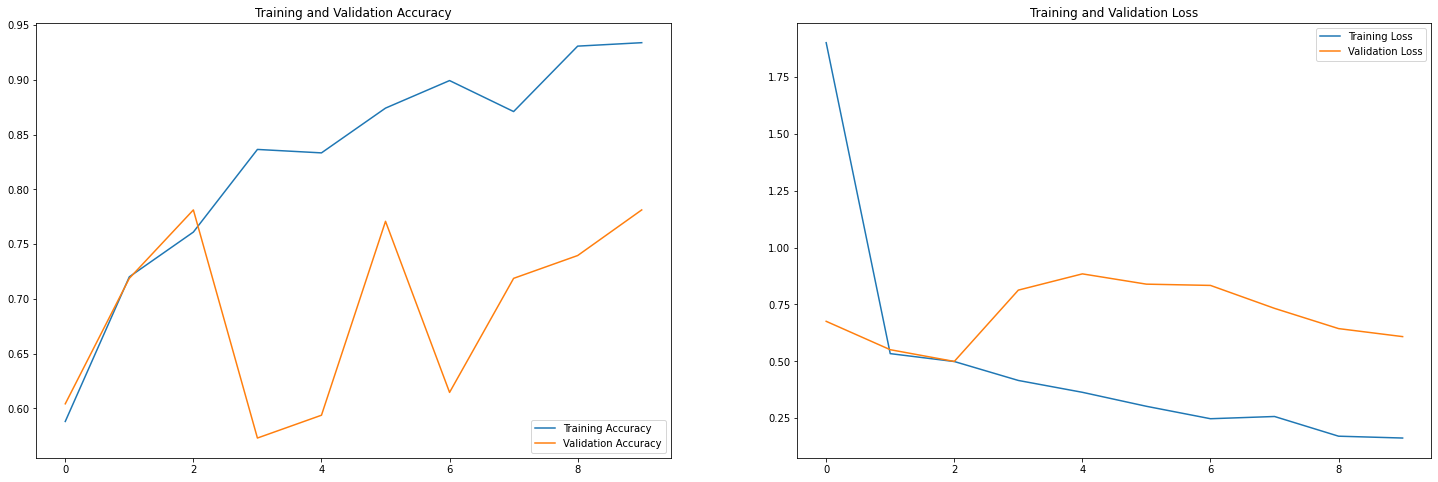

In [ ]:
acc = history_NasNet.history['accuracy']
val_acc = history_NasNet.history['val_accuracy']

loss = history_NasNet.history['loss']
val_loss = history_NasNet.history['val_loss']

epochs_range = range(11)

plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
----

SyntaxError: ignored

1


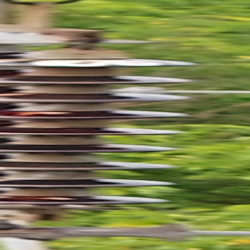

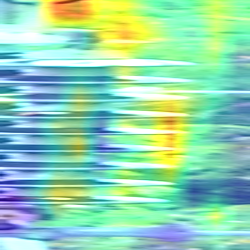

1


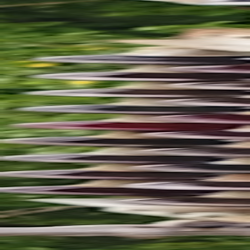

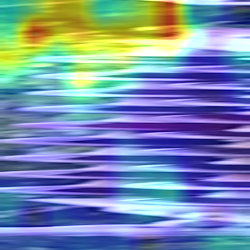

1


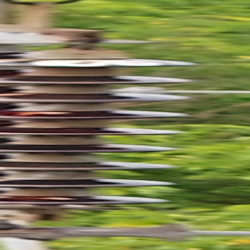

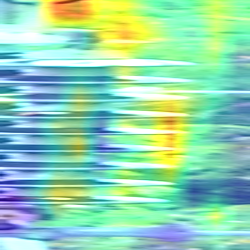

1


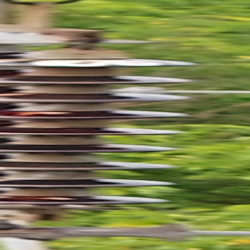

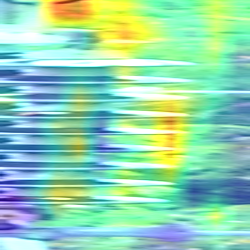

In [ ]:
def gradCAM(orig, intensity=0.5, res=250):
  img = image.load_img(orig, target_size=(331, 331))
  #img = image.load_img(orig, target_size=(471, 471))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  preds = model_NasNet.predict(x)


  

  print(np.argmax(preds))
  #print(decode_predictions(preds))
  #print(decode_predictions(preds)[0][0][1]) # prints the class of image

  with tf.GradientTape() as tape:
    last_conv_layer = model_NasNet.get_layer('normal_conv_1_16')
    iterate = tf.keras.models.Model([model_NasNet.inputs], [model_NasNet.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(x)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    
  heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = heatmap.reshape((11, 11))

  img = cv2.imread(orig)

  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

  img = heatmap * intensity + img

  cv2_imshow(cv2.resize(cv2.imread(orig), (res, res)))
  cv2_imshow(cv2.resize(img, (res, res)))

gradCAM("/content/data/test/damaged/1020.tiff")
gradCAM("/content/data/test/undamaged/1016.tiff")

gradCAM("/content/data/test/damaged/1020.tiff")
gradCAM("/content/data/test/damaged/1020.tiff")
